In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
filenames=os.listdir(r"F:\MIT ADT\Sem 7\Deep Learning Lab\Datasets\dogs-vs-cats\train")
categories =[]
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('dog')
    else:
        categories.append('cat')
        
df=pd.DataFrame({
   'filename': filenames,
   'category': categories
})

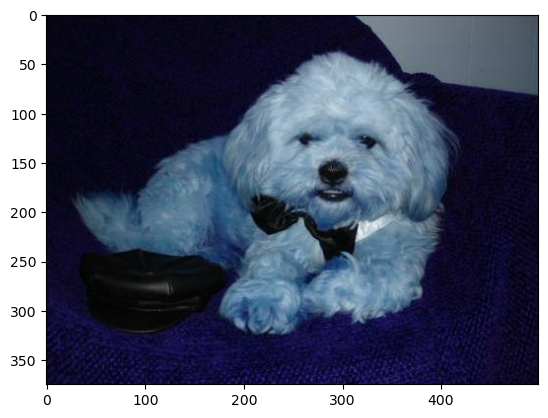

In [18]:
import random 
sample=random.choice(filenames)
image=cv2.imread("F:\\MIT ADT\\Sem 7\\Deep Learning Lab\\Datasets\\dogs-vs-cats\\train\\"+sample)
plt.imshow(image)
#cv2.imshow("Cats-Dogs", image)
#cv2.waitKey(1)

In [17]:
df.head()

,filename,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [41]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_CHANNELS=3

model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3), activation ='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(16,(3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(8,(3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_12 (Ba  (None, 126, 126, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 128)       36992     
                                                                 
 batch_normalization_13 (Ba  (None, 61, 61, 128)       512       
 tchNormalization)                                               
                                                      

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [44]:
from sklearn.model_selection import train_test_split
train_df, validate_df=train_test_split(df, test_size=0.20, random_state=43)
train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

In [45]:
print(train_df.shape)
print(validate_df.shape)

(20000, 2)
(5000, 2)


In [46]:
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15
print(train_df.shape[0],validate_df.shape[0])

20000 5000


In [47]:
#creation of the augmented images
train_datagen=ImageDataGenerator(
    rotation_range = 15,rescale=1./255,
    zoom_range=0.2, horizontal_flip=True,
    width_shift_range=0.1, height_shift_range=0.1)

In [48]:
IMAGE_SIZE=(128,128)
train_generator=train_datagen.flow_from_dataframe(
    train_df,
    r"F:\MIT ADT\Sem 7\Deep Learning Lab\Datasets\dogs-vs-cats\train",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [49]:
validation_datagen=ImageDataGenerator(rescale=1./255)
validation_generator=validation_datagen.flow_from_dataframe(
    validate_df,
    r"F:\MIT ADT\Sem 7\Deep Learning Lab\Datasets\dogs-vs-cats\train",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size 
)

Found 5000 validated image filenames belonging to 2 classes.


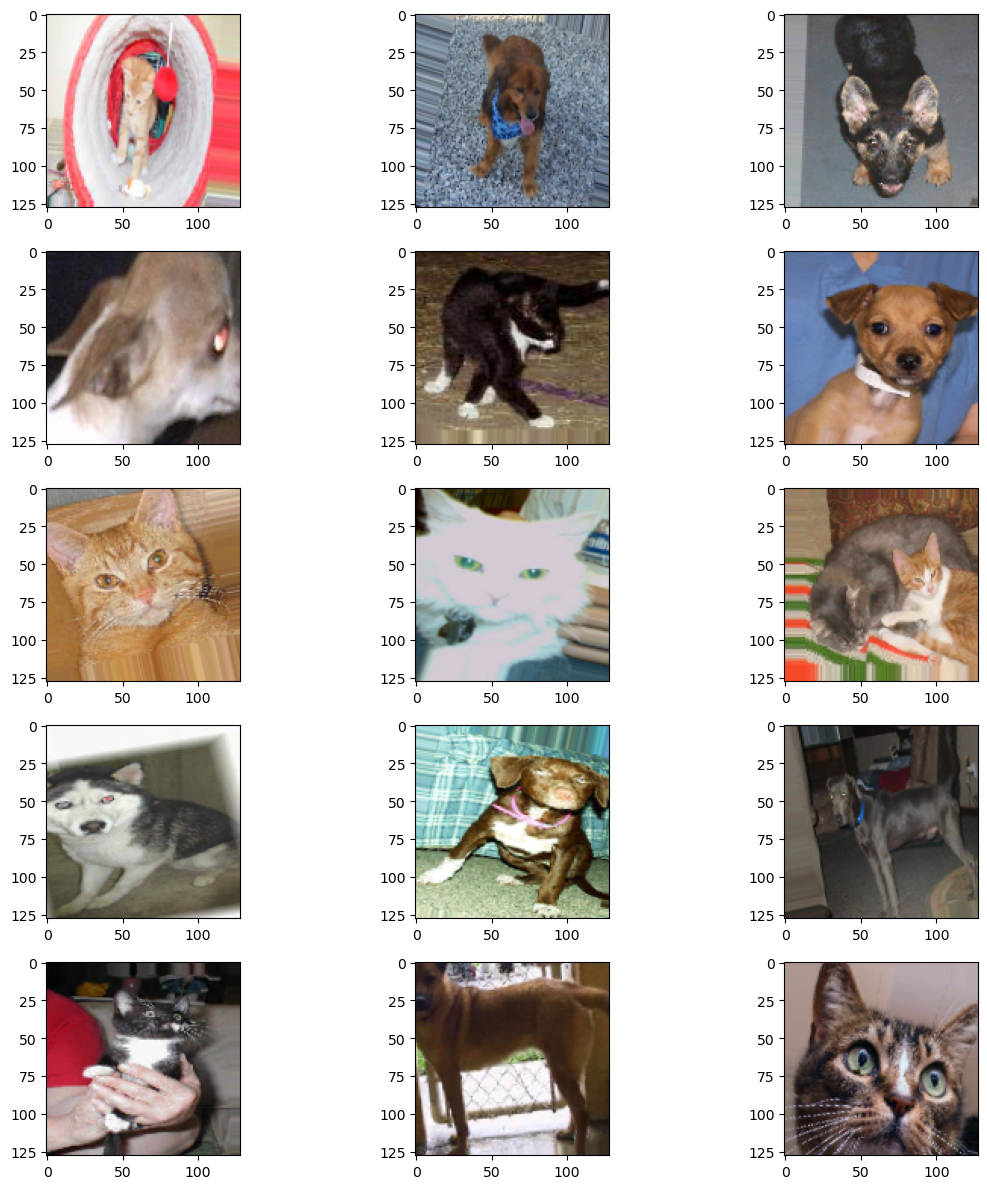

In [50]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [52]:
history=model.fit_generator(
    train_generator, 
    epochs=5, 
    validation_data=validation_generator, 
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size
)

C:\Users\lavan\AppData\Local\Temp\ipykernel_17704\1056352600.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/5
1333/1333 [==============================] - 542s 406ms/step - loss: 0.6260 - accuracy: 0.6475 - val_loss: 0.7050 - val_accuracy: 0.5638
Epoch 2/5
1333/1333 [==============================] - 579s 434ms/step - loss: 0.5865 - accuracy: 0.6929 - val_loss: 0.5400 - val_accuracy: 0.7205
Epoch 3/5
1333/1333 [==============================] - 404s 303ms/step - loss: 0.5408 - accuracy: 0.7319 - val_loss: 0.6382 - val_accuracy: 0.6478
Epoch 4/5
1333/1333 [==============================] - 417s 313ms/step - loss: 0.5026 - accuracy: 0.7642 - val_loss: 0.4419 - val_accuracy: 0.8052
Epoch 5/5
1333/1333 [==============================] - 2181s 2s/step - loss: 0.4752 - accuracy: 0.7819 - val_loss: 0.3881 - val_accuracy: 0.8276


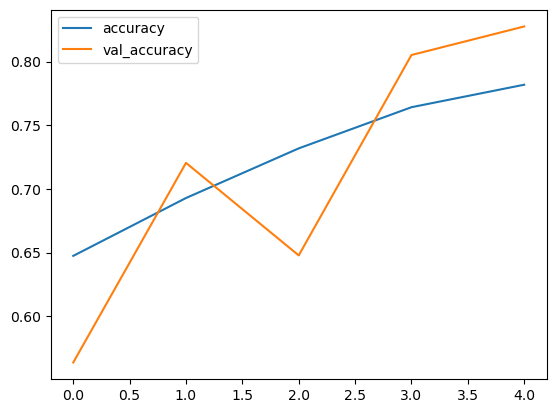

In [53]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

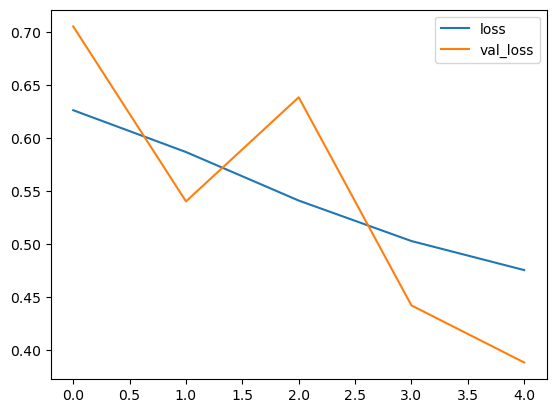

In [54]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label ='val_loss')
plt.legend()
plt.show()